In [1]:
# 기본 환경 로드
%run ./env.ipynb

# Exploratory Data Analysis - TSNE

EDA를 위해 고차원 데이터를 2D 상에 맵핑 시켜 클러스터링 가능성 여부를 볼 수 있는 TSNE를 해봅니다.

이 프로젝트에서 사용한 784차원 이미지 데이터를 0-9 클래스로 클러스터링 해 봄으로써, 분류가 성공적으로 가능할 지 가늠해 봅니다.

In [2]:
from utils import *

sdate = get_env_sdate(default = "2018070108")
path_data = get_env_path_date(default = "/root/mnt/dfs/data/mnist")

print("sdate: {}".format(sdate))
print("path_data: {}".format(path_data))

sdate: 2018070108
path_data: /root/mnt/dfs/data/mnist


In [3]:
# 데이터 로드
import os
from sklearn.externals import joblib 

path_raw = os.path.join(path_data, "raw")
path_raw_sdate = os.path.join(path_raw, sdate)

path_train_xs = os.path.join(path_raw_sdate, "train_xs.pkl")
path_train_ys = os.path.join(path_raw_sdate, "train_ys.pkl")
np_train_xs = joblib.load(path_train_xs)
np_train_ys = joblib.load(path_train_ys)

path_test_xs = os.path.join(path_raw_sdate, "test_xs.pkl")
path_test_ys = os.path.join(path_raw_sdate, "test_ys.pkl")
np_test_xs = joblib.load(path_test_xs)
np_test_ys = joblib.load(path_test_ys)

print(np_train_xs.shape, np_train_ys.shape)
print(np_test_xs.shape, np_test_ys.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# 전처리
dim_x = np_train_xs.shape[1] * np_train_xs.shape[2]
dim_y = 10
np_train_xs = np_train_xs.reshape(-1, dim_x).astype(float)
np_test_xs = np_test_xs.reshape(-1, dim_x).astype(float)
print(np_train_xs.shape)
print(np_test_xs.shape)

(60000, 784)
(10000, 784)


In [5]:
# 전처리
from sklearn import preprocessing

path_eda = os.path.join(path_data, "eda")
path_eda_sdate = os.path.join(path_eda, sdate)
os.makedirs(path_eda_sdate, exist_ok=True)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_train_xs = scaler.fit_transform(np_train_xs)

path_scaler = os.path.join(path_eda_sdate, "tsne-scaler.pkl")
joblib.dump(scaler, path_scaler)

scaler = joblib.load(path_scaler)
np_test_xs = scaler.fit_transform(np_test_xs)

['/root/mnt/dfs/data/mnist/eda/2018070108/tsne-scaler.pkl']

In [6]:
# 전처리 - 비복원 추출 랜덤 샘플링
ridx = np.random.choice(np_train_xs.shape[0], 1000, replace=False)
np_train_sample_xs = np_train_xs[ridx]
np_train_sample_ys = np_train_ys[ridx]
print(np_train_sample_xs.shape, np_train_sample_ys.shape)

(1000, 784) (1000,)


In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(random_state=42, learning_rate=100)
np_tsne = model.fit_transform(np_train_sample_xs)

np_tsne_xs = np_tsne[:,0]
np_tsne_ys = np_tsne[:,1]

<Figure size 1008x1008 with 0 Axes>

Text(0.5,1,'t-SNE')

Text(0.5,0,'x')

Text(0,0.5,'y')

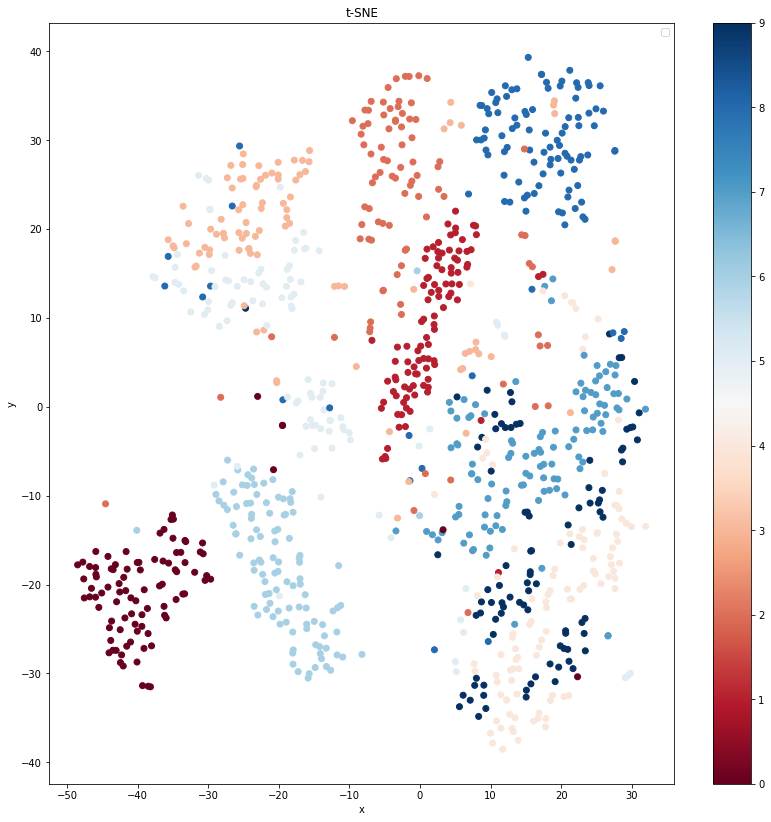

In [8]:
import matplotlib.cm as cm

plt.figure(figsize=(14, 14))
colors = np_train_sample_ys
plt.scatter(np_tsne_xs, np_tsne_ys, c=colors, cmap=cm.RdBu)
plt.title("t-SNE")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.legend()
plt.show()

많은 레이블들이 클러스터를 이루는 것으로 보아 분류가 가능할 것으로 보입니다.